In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csv222/cleaned_data.csv


In [6]:
# Блок 1: Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping


In [7]:
# Блок 2: Загрузка данных и преобразование формата даты
data = pd.read_csv('/kaggle/input/csv222/cleaned_data.csv')

# Проверяем первые несколько строк, чтобы понять формат даты
print(data.head())

# Предполагаем, что у вас есть столбец 'date' в формате строки
# Преобразуем столбец 'date' в формат datetime, игнорируя ошибки
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Удаляем строки с некорректными датами
data = data.dropna(subset=['date'])

# Устанавливаем дату как индекс
data.set_index('date', inplace=True)

# Проверяем результат
print(data.head())

                                        system:index      area        date  \
0  00000000000000000029_20180118T090301_20180118T...  0.001503  2018-01-18   
1  00000000000000000029_20180118T090301_20180118T...  0.001502  2018-01-18   
2  00000000000000000029_20180118T090301_20180118T...  0.001502  2018-01-18   
3  00000000000000000029_20180121T091301_20180121T...  0.001503  2018-01-21   
4  00000000000000000029_20180121T091301_20180121T...  0.001502  2018-01-21   

   lake_id                                    .geo  
0       29  {"type":"MultiPoint","coordinates":[]}  
1       29  {"type":"MultiPoint","coordinates":[]}  
2       29  {"type":"MultiPoint","coordinates":[]}  
3       29  {"type":"MultiPoint","coordinates":[]}  
4       29  {"type":"MultiPoint","coordinates":[]}  
                                                 system:index      area  \
date                                                                      
2018-01-18  00000000000000000029_20180118T090301_20180118T...  

In [8]:
# Блок 3: Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data['area'] = scaler.fit_transform(data['area'].values.reshape(-1, 1))


In [9]:
# Блок 4: Создание временных последовательностей
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

data_values = data['area'].values.reshape(-1, 1)
time_step = 5
X, y = create_dataset(data_values, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [10]:
# Блок 5: Разделение на обучающие и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.3256e-04 - val_loss: 1.4508e-05
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7076e-05 - val_loss: 4.6301e-06
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5355e-05 - val_loss: 4.6985e-06
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2950e-05 - val_loss: 2.2446e-06
Epoch 5/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0244e-05 - val_loss: 1.5420e-06
Epoch 6/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5918e-05 - val_loss: 1.1298e-05
Epoch 7/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3634e-05 - val_loss: 1.6418e-05
Epoch 8/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8564e-05 - val_loss: 2.2490e-06
Epoch 9/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8901e-05 - val_loss: 2.7474e-06
Epoch 10/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0486e-05 - val_loss: 1.2011e-06
Epoch 11/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5865e-

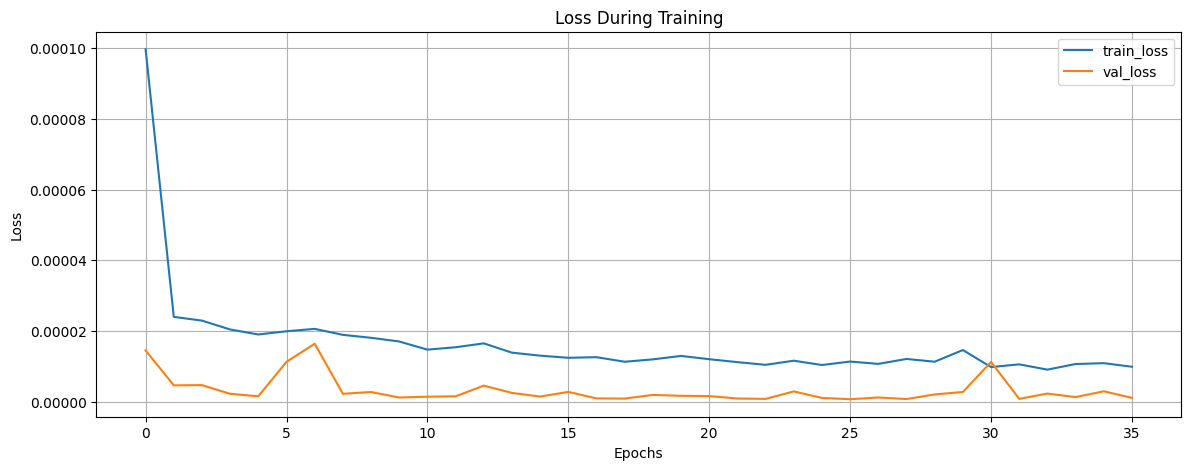

In [11]:
# Блок 6: Создание и обучение модели
# Блок 6: Создание и обучение модели (улучшенная версия)

# Создание модели
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))

# Добавление слоев с увеличением количества нейронов
model.add(LSTM(100, return_sequences=True))  # Увеличено количество нейронов
model.add(Dropout(0.3))  # Увеличен Dropout для уменьшения переобучения
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Установлена скорость обучения
              loss='mean_squared_error')

# Параметры для обучения
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
history = model.fit(X_train, y_train, 
                    epochs=200,  # Увеличено количество эпох
                    batch_size=32,  # Увеличен размер батча
                    validation_split=0.2,  # Увеличен объем валидационного набора
                    callbacks=[early_stopping],
                    verbose=1)  # Установлен вывод информации о процессе обучения

# Визуализация потерь
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()



In [12]:
# Блок 7: Предсказание и обратная нормализация
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


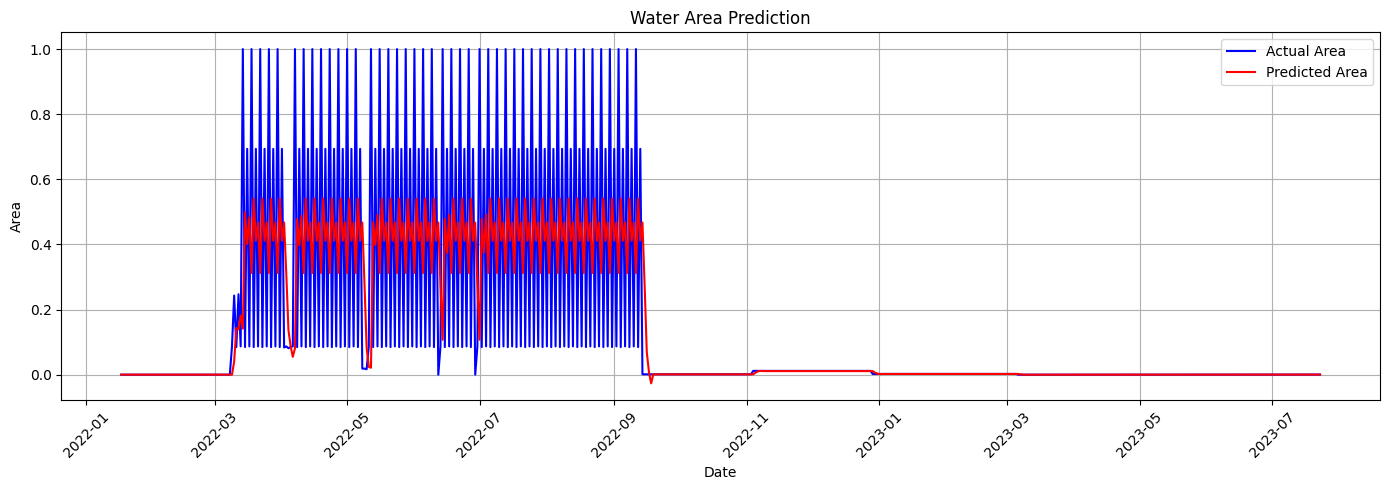

In [13]:
# Блок 8: Генерация диапазона дат и визуализация
# Определяем длину тестового набора
test_length = len(y_test)

# Получаем последние даты, соответствующие длине y_test
# Используем индекс для получения даты
start_test_date = data.index[-(test_length + time_step)]  
test_dates = pd.date_range(start=start_test_date, periods=test_length, freq='D')

# Визуализация графика
plt.figure(figsize=(14, 5))
plt.plot(test_dates, y_test, color='blue', label='Actual Area')  # Реальные значения
plt.plot(test_dates, y_pred, color='red', label='Predicted Area')  # Предсказанные значения
plt.title('Water Area Prediction')
plt.xlabel('Date')
plt.ylabel('Area')
plt.xticks(rotation=45)  # Повернуть подписи по оси X для лучшей читаемости
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()